<a href="https://colab.research.google.com/github/MRazin172/2015/blob/main/2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import zscore

In [12]:
year=pd.read_csv('/content/2015.csv')

In [13]:
year.shape

(158, 12)

In [14]:
year.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [15]:
year.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
print(year.isnull().sum())
print(year.describe())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
       Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family 

In [17]:
year

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [18]:
year = pd.read_csv('/content/2015.csv')
X_happiness = year[['Happiness Score']]
n_bins = 3
age_bin_edges = [4,5, 6, np.inf]
age_bin_labels = ['Low Happiness', 'Medium Happiness', 'High Happiness']
bin_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal')
X_happiness_binned = bin_encoder.fit_transform(X_happiness)
binned_year = pd.DataFrame(X_happiness_binned, columns=['Happiness_Binned'])
year_binned = pd.concat([year, binned_year], axis=1)
print(year_binned.head())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [30]:
import pandas as pd

year=pd.read_csv('/content/2015.csv')
region_ecoded = pd.get_dummies(year, columns=['Region'])
region_ecoded.to_csv('encoded_dataset.csv', index=False)
print(region_ecoded)

         Country  Happiness Rank  Happiness Score  Standard Error  \
0    Switzerland               1            7.587         0.03411   
1        Iceland               2            7.561         0.04884   
2        Denmark               3            7.527         0.03328   
3         Norway               4            7.522         0.03880   
4         Canada               5            7.427         0.03553   
..           ...             ...              ...             ...   
153       Rwanda             154            3.465         0.03464   
154        Benin             155            3.340         0.03656   
155        Syria             156            3.006         0.05015   
156      Burundi             157            2.905         0.08658   
157         Togo             158            2.839         0.06727   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                

In [21]:
from scipy.stats import zscore
zscore_year = year.apply(zscore)

TypeError: ignored

In [22]:
o_c=((zscore_year>3)|(zscore_year<-3)).sum()
o_c

NameError: ignored

<ipython-input-23-6ed0e8b48650>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = year.corr()


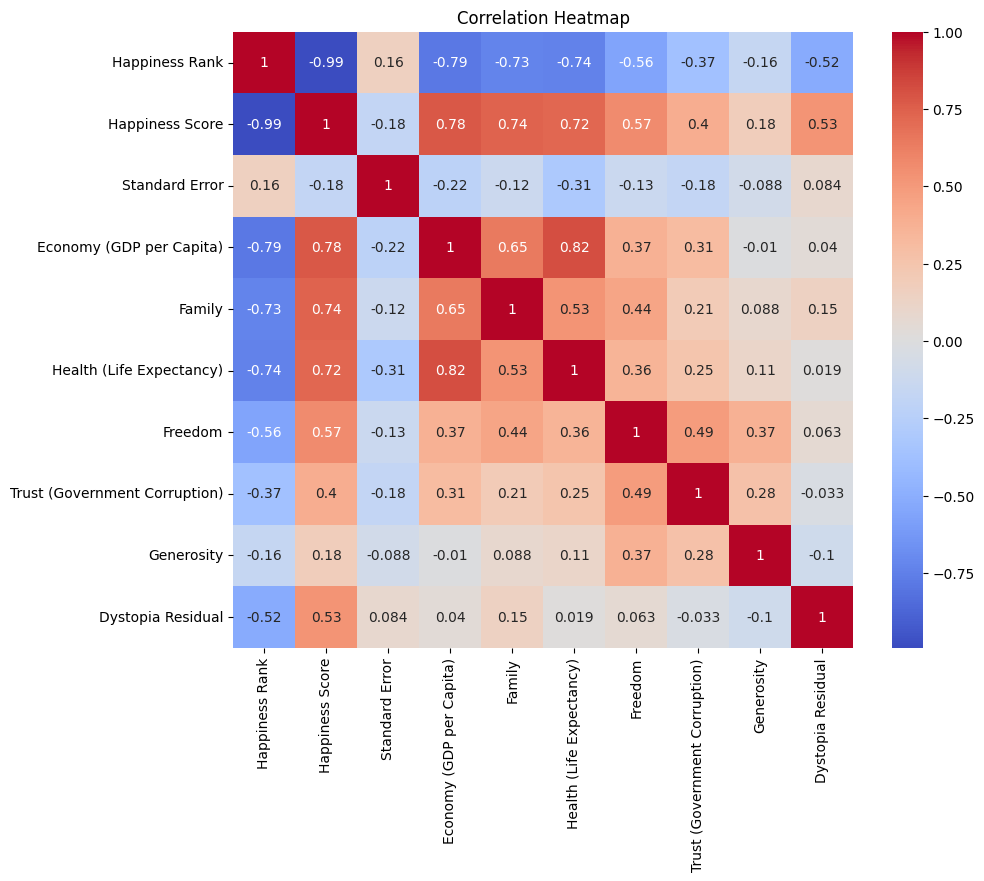

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = year.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [24]:
covariance = year['Economy (GDP per Capita)'].cov(year['Family'])
print(covariance)

0.07085234866890268


In [25]:
covariance_matrix = np.cov(year['Economy (GDP per Capita)'],year['Family'])
covariance_matrix

array([[0.16250636, 0.07085235],
       [0.07085235, 0.07418492]])

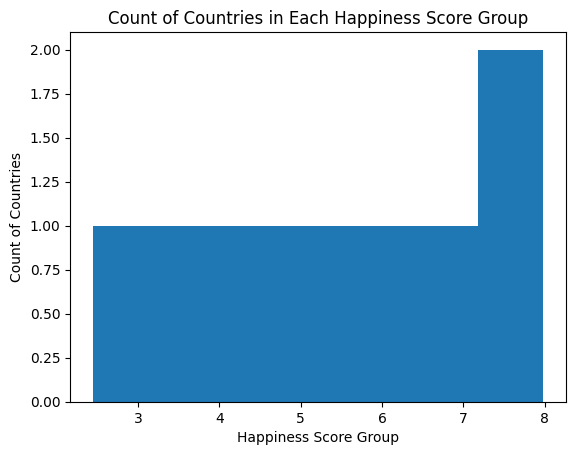

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
happiness_score_groups = year['Happiness Score'].unique()

count_of_countries_per_group = year['Happiness Score'].value_counts()
plt.bar(happiness_score_groups, count_of_countries_per_group)
plt.xlabel('Happiness Score Group')
plt.ylabel('Count of Countries')
plt.title('Count of Countries in Each Happiness Score Group')
plt.show()


AttributeError: ignored

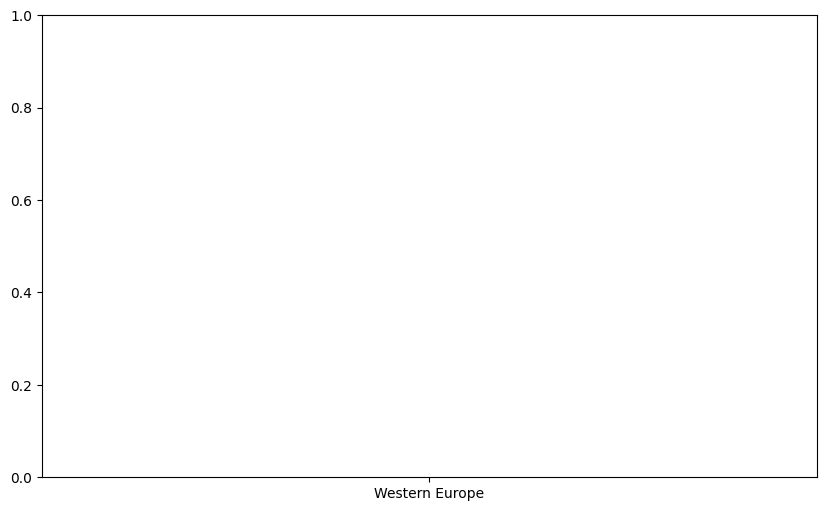

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(year['Region'], year['Happiness Score'], stacked=True)
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.title('Distribution of Happiness Score by Region')
plt.legend()
plt.show()


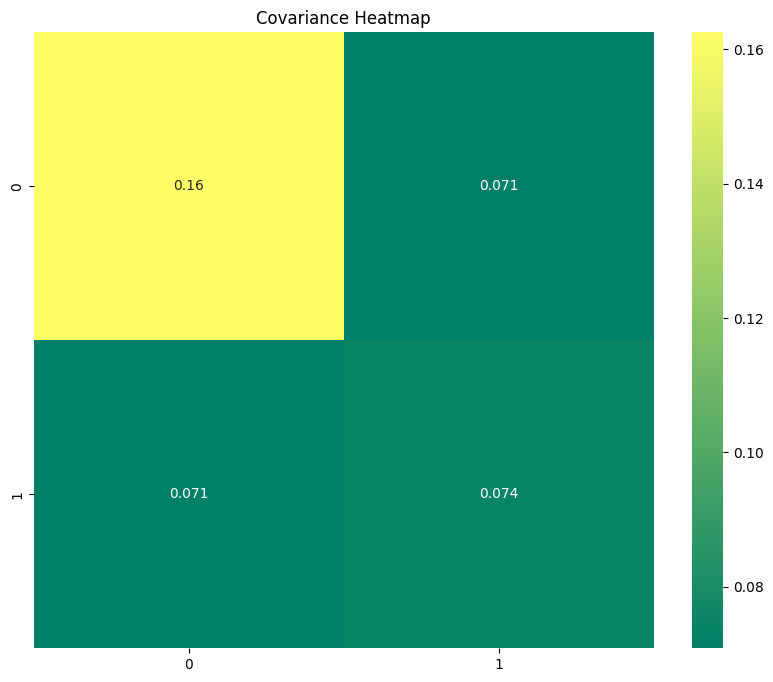

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap="summer")
plt.title("Covariance Heatmap")
plt.show()